In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

## RLE compression : 


In [43]:
def encode_rle(input) : 
    output = ""
    lenght = len(input)
    i=0
    tmp = []
    
    while(i < lenght ):
        chaine = str(input[i])
        cpt = 1
        j=i
        while(j < lenght - 1):
            if(input[j]==input[j+1]):
                cpt+=1
                j+=1
            else : 
                break
        
        if(cpt >2):
            tmp.append([cpt , chaine])
        else : 
                   
            if (len(tmp)!=0):
                
                if(tmp[-1][0]<=2):
                    tmp[-1][1] = tmp[-1][1] + ( chaine * cpt)
                    tmp[-1][0]+=cpt
                else : 
                    tmp.append([cpt , chaine * cpt])
            else :  
                tmp.append([cpt , chaine * cpt])
                
        i = j+1
        
    for repi , ch in tmp :
        if(repi >2 ) and (len(ch)==1):     
            output=output+"{:03}".format(128+repi)+ch
        else:    
            output=output+"{:03}".format(repi)+ch 
            
    print("repitition valeurs :  \n" , tmp)
        
    return {"tmp" :tmp , "code" :output}

In [44]:
def Calculate_taux (encode_dict , original):
    tmp = encode_dict["tmp"]
    taille = 0
    for x , y in tmp :
        if(x>2) and (len(y)==1):
            taille += 8 + 1
        else : 
            taille +=8+x
            
    return (taille , original)
    

### Test sur image 1 et image 2 

before flat : 
 [[0 0 1 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 1 1 1]
 [0 0 0 1 1 0]
 [1 1 1 0 0 0]
 [0 1 1 1 1 1]]
after flat 
 [0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1]
repitition valeurs :  
 [[2, '00'], [7, '1'], [3, '0'], [6, '1'], [3, '0'], [3, '110'], [3, '1'], [4, '0'], [5, '1']]
 image code RLE :  002001351131013411310003110131113201331
taille original :  288  bits
taille apres codage :  84  bits
taux de compression :  29.166666666666668


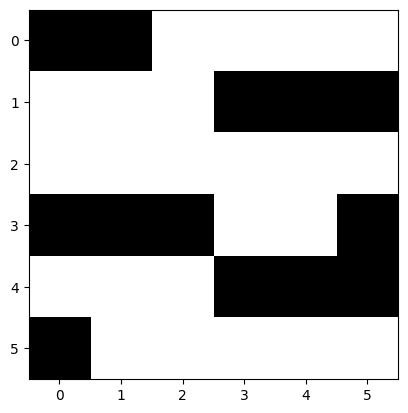

In [49]:
image = plt.imread("image1.png" ).astype(np.int8)

plt.imshow(image , cmap="gray")
print("before flat : \n" , image)
flatted = image.flatten()
print("after flat \n" , flatted)

x = encode_rle(flatted)
print(" image code RLE : " ,x["code"])

original_bits = 288
coded_bits=Calculate_taux(x , original_bits)[0]
print("taille original : " , original_bits , " bits")
print("taille apres codage : " , coded_bits , " bits")
print("taux de compression : " , coded_bits / original_bits * 100)

with open("codeimage1.txt" , 'w') as file : 
    file.write(x["code"])

before flat : 
 [[1 1 1 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [0 0 0 0 0 0]]
after flat 
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
repitition valeurs :  
 [[6, '1'], [12, '0'], [12, '1'], [6, '0']]
 image code RLE :  1341140014011340
taille original :  288  bits
taille apres codage :  36  bits
taux de compression :  12.5


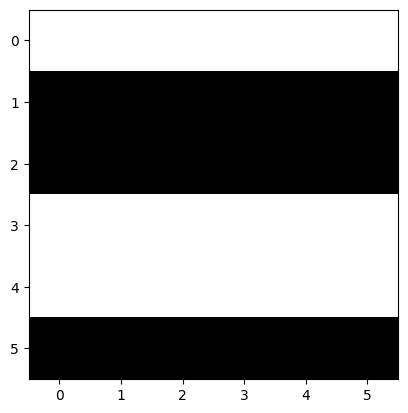

In [47]:
image = plt.imread("image2.png" ).astype(np.int8)

plt.imshow(image , cmap="gray")
print("before flat : \n" , image)
flatted = image.flatten()
print("after flat \n" , flatted)

x = encode_rle(flatted)
print(" image code RLE : " ,x["code"])

original_bits = 288
coded_bits=Calculate_taux(x , original_bits)[0]
print("taille original : " , original_bits , " bits")
print("taille apres codage : " , coded_bits , " bits")
print("taux de compression : " , coded_bits / original_bits * 100)

with open("codeimage2.txt" , 'w') as file : 
    file.write(x["code"])

## Decompression RLE : 

In [50]:

def decode_rle(code_file):
    with open(str(code_file) , 'r') as file:
        code = file.readline()
    print(code)    
    tmp= []
    
    i=0
    while(i< len(code)):
        j=i+3
        repit = int(code[i:j])
        if(repit < 128):                    # dans ce cas repit represent la longueur de la sequence non repete 
            tmp.append(code[j:j+repit])
            i=j+repit
        else:
            tmp.append(code[j] * (repit-128)) 
            i=j+1
        
    print(tmp)
    
    output = np.array(list("".join(tmp))).astype(np.uint8)

    return({"tmp" : tmp , "decode" : output})

### decoder image 1 et 2 

In [51]:

decode1 = decode_rle("codeimage1.txt")
print(decode1["decode"])
print("\n")
decode2 = decode_rle("codeimage2.txt")
print(decode2["decode"])



002001351131013411310003110131113201331
['00', '1111111', '000', '111111', '000', '110', '111', '0000', '11111']
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1]


1341140014011340
['111111', '000000000000', '111111111111', '000000']
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]


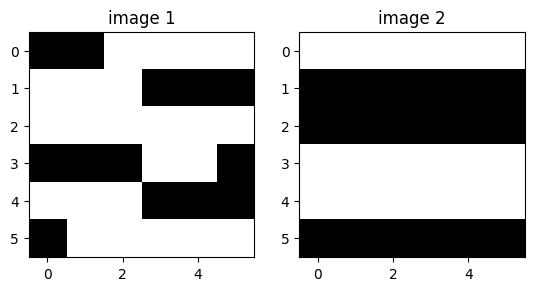

In [52]:
image1_decode = decode1["decode"].reshape((6,6))
image2_decode = decode2["decode"].reshape((6,6))

figure, plots = plt.subplots(1, 2)

plots[0].imshow(image1_decode, cmap='gray')
plots[0].set_title('image 1')
plots[1].imshow(image2_decode, cmap='gray')
plots[1].set_title('image 2')
plt.show()

## test sur grayscale image ( apres binarization )

avant codage :   shape =  (128, 128)  length en bits :  131072


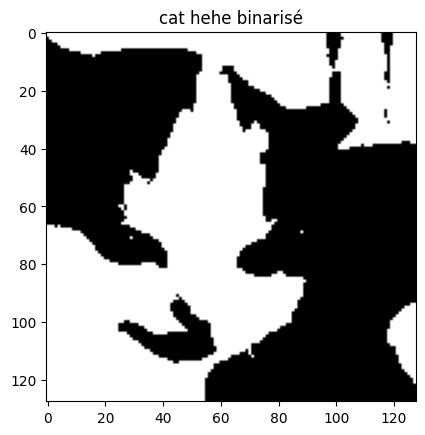

In [53]:
cathehe=cv2.imread("cat evil hehe.jpg" , cv2.IMREAD_GRAYSCALE).astype(np.uint8)
cathehe = cv2.resize(cathehe , (128 , 128))

# binarise l'image

threshold = 127
_, binarycat = cv2.threshold(cathehe, threshold, 255, cv2.THRESH_BINARY)
binarycat =(binarycat/255).astype(np.uint8)


np.savetxt("cathehe_pixels.txt" , binarycat , fmt="%d")

print("avant codage : " , " shape = "  , binarycat.shape," length en bits : " , binarycat.size * 8 )
plt.imshow(binarycat , cmap="gray")
plt.title("cat hehe binarisé")
plt.show()

In [54]:
codecathehe = encode_rle(binarycat.flatten())
print("code cathehe : \n" , codecathehe["code"])

original_bits = binarycat.shape[0] * binarycat.shape[1] * 8
coded_bits=Calculate_taux(codecathehe , original_bits)[0]
print("taux de compression : "  , coded_bits / original_bits * 100)

with open("codecathehe.txt" , 'w') as file : 
    file.write(codecathehe["code"])


repitition valeurs :  
 [[97, '1'], [5, '0'], [14, '1'], [4, '0'], [105, '1'], [5, '0'], [14, '1'], [4, '0'], [8, '1'], [1, '0'], [96, '1'], [6, '0'], [13, '1'], [4, '0'], [8, '1'], [2, '00'], [95, '1'], [5, '0'], [14, '1'], [4, '0'], [8, '1'], [4, '0'], [93, '1'], [5, '0'], [15, '1'], [3, '0'], [8, '1'], [5, '0'], [92, '1'], [5, '0'], [15, '1'], [2, '00'], [9, '1'], [8, '0'], [18, '1'], [23, '0'], [49, '1'], [3, '0'], [16, '1'], [2, '00'], [9, '1'], [12, '0'], [7, '1'], [33, '0'], [46, '1'], [3, '0'], [16, '1'], [2, '00'], [9, '1'], [16, '0'], [1, '1'], [37, '0'], [43, '1'], [4, '0'], [17, '1'], [1, '0'], [9, '1'], [54, '0'], [44, '1'], [3, '0'], [17, '1'], [1, '0'], [9, '1'], [54, '0'], [44, '1'], [2, '00'], [18, '1'], [1, '0'], [9, '1'], [54, '0'], [44, '1'], [2, '00'], [18, '1'], [1, '0'], [9, '1'], [54, '0'], [7, '1'], [4, '0'], [34, '1'], [1, '0'], [18, '1'], [1, '0'], [9, '1'], [54, '0'], [7, '1'], [4, '0'], [53, '1'], [1, '0'], [9, '1'], [53, '0'], [7, '1'], [6, '0'], [33, '1']

## decompression


2251133014211320233113301421132013610010224113401411132013610020022311330142113201361132022111330143113101361133022011330143100200137113601461151017711310144100200137114001351161017411310144100200137114400011165017111320145100101371182017211310145100101371182017210020014610010137118201721002001461001013711820135113201621001014610010137118201351132018110010137118101351134016111310143100200137118001391132016011310143100200137118001391133015811320143100200137118001391135015611320144100101371180014011340156113201541180014011360154113201441001013711800140113801521132015411800140114001501132015411800140114201481132015411800140114301471132015411800140114401461132015411790142114401421136015311790142114601351142015211750131100101431167014010010138117401481168013910010138117401481169013810010138117301491170014811730150113300011163013810010137117201511132013111610149117201521131013111610149117201521001013511580150117101621156015111710162115501521170016311540153117001631153014911310002111700163115

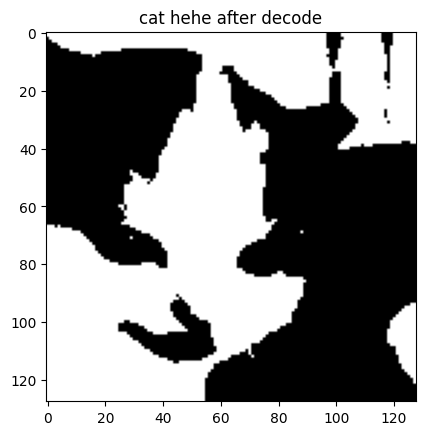

True


In [55]:

cathehe_decode = decode_rle("codecathehe.txt")
cathehe_afterdecode = cathehe_decode["decode"].reshape(128,128)
plt.imshow(cathehe_afterdecode , cmap="gray")
plt.title("cat hehe after decode")
plt.show()

print(np.array_equal(binarycat , cathehe_afterdecode))


## test sur cablecar image grayscale

avant codage :   shape =  (128, 128)  length en octet :  131072


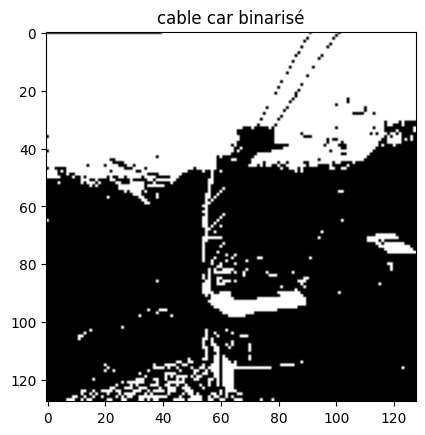

In [34]:
cablecar=cv2.imread("cablecar.bmp", cv2.IMREAD_GRAYSCALE).astype(np.uint8)
np.savetxt("cablecar_pixels.txt" , cablecar , fmt="%d")

cablecar = cv2.resize(cablecar , (128 , 128))

# binarise l'image

threshold = 127
_, binarycable = cv2.threshold(cablecar, threshold, 255, cv2.THRESH_BINARY)
binarycable =(binarycable/255).astype(np.uint8)

print("avant codage : " , " shape = "  , binarycable.shape," length en octet : " , binarycable.size * 8 )
plt.imshow(binarycable , cmap="gray")
plt.title("cable car binarisé")
plt.show()

In [35]:
codecablecar = encode_rle(binarycable.flatten())
print("code cablecar : \n" , codecablecar["code"])


print("taux de compression : " , Calculate_taux(codecablecar , 128 * 128 * 8))
with open("codecablecar.txt" , 'w') as file : 
    file.write(codecablecar["code"])


repitition valeurs :  
 [[40, '0'], [51, '1'], [1, '0'], [9, '1'], [1, '0'], [126, '1'], [1, '0'], [117, '1'], [1, '0'], [8, '1'], [1, '0'], [117, '1'], [1, '0'], [136, '1'], [1, '0'], [117, '1'], [1, '0'], [8, '1'], [1, '0'], [245, '1'], [1, '0'], [126, '1'], [1, '0'], [8, '1'], [1, '0'], [126, '1'], [1, '0'], [118, '1'], [1, '0'], [254, '1'], [1, '0'], [7, '1'], [1, '0'], [246, '1'], [1, '0'], [134, '1'], [1, '0'], [246, '1'], [1, '0'], [134, '1'], [1, '0'], [119, '1'], [1, '0'], [134, '1'], [1, '0'], [119, '1'], [1, '0'], [6, '1'], [1, '0'], [127, '1'], [1, '0'], [126, '1'], [1, '0'], [18, '1'], [1, '0'], [107, '1'], [1, '0'], [19, '1'], [1, '0'], [123, '1'], [1, '0'], [103, '1'], [1, '0'], [6, '1'], [1, '0'], [26, '1'], [1, '0'], [99, '1'], [1, '0'], [27, '1'], [1, '0'], [92, '1'], [1, '0'], [30, '1'], [4, '0'], [3, '1'], [1, '0'], [95, '1'], [1, '0'], [120, '1'], [1, '0'], [5, '1'], [1, '0'], [164, '1'], [1, '0'], [4, '1'], [2, '01'], [4, '0'], [73, '1'], [1, '0'], [5, '1'], [1, '

1680179100101371001025410010245100101361001024510010264100102451001013610010373100102541001013610010254100102461001038210010135100103741001026210010374100102621001024710010262100102471001013410010255100102541001014610010235100101471001025110010231100101341001015410010227100101551001022010010158113201311001022310010248100101331001029210010132100201132020110010133100101651003011131000111320196113100011133000210149100101401001013111380195114101661132000111330195114101371001015110030101311003011002011340194114001381131015310030101311131000210195114001461004010014310020013310030100021019411410146100101321001014011310133113301921002011460140100101321131013910020113100011135019310030011420148100200138114301921002011390148100101421143019211370157100200136114401661001014810020113901671145015010020016311330002111330151100101431146015111320160114001321001013210030110010133100200136100301113200011149014210010133100101321131000311015611390131100301000411000031001351001013111320001113300011152000211

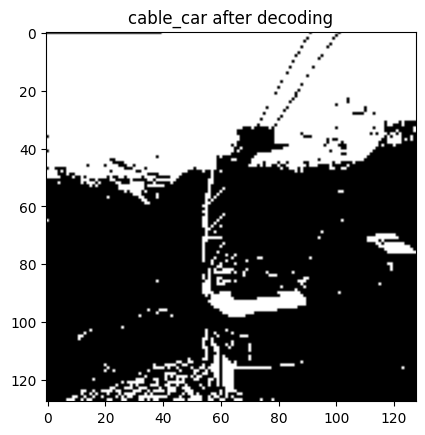

In [36]:

cablecar_decode = decode_rle("codecablecar.txt")
image_cablecar_afterdecode = cablecar_decode["decode"].reshape((128,128))
print(cablecar_decode["decode"])
plt.imshow(image_cablecar_afterdecode , cmap="gray")
plt.title("cable_car after decoding")
plt.show()

In [5]:
import cv2

# Read the images
image1 = cv2.imread('image1.png').astype(np.uint8)
image2 = cv2.imread('image2.png').astype(np.uint8)

# Add the images with saturation
result = cv2.add(image1, image2)
print(image1.shape , image2.shape , result.shape)

# Display the result
cv2.imshow("kk", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

(6, 6, 3) (6, 6, 3) (6, 6, 3)
